# IS620 High Frequency Words
## Robert Sellers | October 23, 2016

### Natural Language Processing Demonstration

**Data:** [LINK TO CORPUS DATA](http://www.independent.co.uk/news/world/asia/china-surveillance-big-data-score-censorship-a7375221.html)

**Guide:** [LINK TO .IPYNB](https://rawgit.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition/master/ipynb/html/Chapter%205%20-%20Mining%20Web%20Pages.html)

The following should take any article-containing (check DOM elements) or similar html page and output similar results.

### The Corpus

In [2]:
from boilerpipe.extract import Extractor
URL='http://www.independent.co.uk/news/world/asia/china-surveillance-big-data-score-censorship-a7375221.html'
extractor = Extractor(extractor='ArticleExtractor', url=URL)
corpus = extractor.getText()
print corpus

Asia
China wants to give all of its citizens a score – and their rating could affect every area of their lives
The Communist Party wants to encourage good behaviour by marking all its people using online data. Those who fall short will be denied basic freedoms like loans or travel
Sunday 23 October 2016 17:37 BST
China's ambitious plans to develop a far-reaching social credit system by collecting information online
Tom Hanks helps Alec Baldwin spoof third Presidential debate on SNL
Imagine a world where an authoritarian government monitors everything you do, amasses huge amounts of data on almost every interaction you make, and awards you a single score that measures how “trustworthy” you are.
In this world, anything from defaulting on a loan to criticising the ruling party, from running a red light to failing to care for your parents properly, could cause you to lose points. And in this world, your score becomes the ultimate truth of who you are – determining whether you can borrow mo

### How many total unique words are in the corpus?

In [3]:
import nltk
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
tokens=tokenizer.tokenize(corpus)
print "The total number of words is %d:" %  len(tokens)

The total number of words is 1822:


### Taking the most common words, how many unique words represent half of the total words in the corpus?

In [4]:
from nltk.probability import FreqDist
text = nltk.Text(tokens)
frequencies = sorted(FreqDist(text).values(), reverse=True)
wordCount = 0
iterate = 0
for number in frequencies:
    wordCount += number
    iterate += 1
    if wordCount >= len(tokens)/2:
        break
print "The number of unique words inside half of the corpus is: %d" % iterate 

The number of unique words inside half of the corpus is: 88


### Identify the 200 highest frequency words in this corpus.

In [5]:
print(FreqDist(text).most_common()[:200])

[(u'the', 67), (u'a', 56), (u'to', 53), (u'of', 53), (u'and', 49), (u'in', 34), (u'is', 25), (u'be', 20), (u'that', 19), (u's', 17), (u'or', 17), (u'China', 16), (u'for', 16), (u'social', 13), (u'government', 13), (u'credit', 12), (u'on', 12), (u'this', 11), (u'will', 11), (u'it', 11), (u'said', 10), (u'who', 10), (u'you', 10), (u'could', 9), (u'The', 9), (u'with', 9), (u'would', 8), (u'can', 8), (u'information', 8), (u'their', 8), (u'online', 8), (u'people', 8), (u'Communist', 7), (u'its', 7), (u'system', 7), (u'score', 7), (u'But', 7), (u'party', 7), (u'by', 7), (u'citizens', 7), (u'but', 7), (u'an', 7), (u'all', 6), (u'behaviour', 6), (u'from', 6), (u'Party', 6), (u'also', 6), (u'are', 6), (u'at', 6), (u'has', 6), (u'as', 6), (u'scores', 6), (u'more', 5), (u'A', 5), (u'after', 5), (u'good', 5), (u'not', 5), (u'society', 5), (u'out', 5), (u'plan', 5), (u'points', 5), (u'media', 5), (u'I', 5), (u'he', 5), (u'up', 5), (u'far', 4), (u'companies', 4), (u'plans', 4), (u'data', 4), (u'ever

### Create a graph that shows the relative frequency of these 200 words.

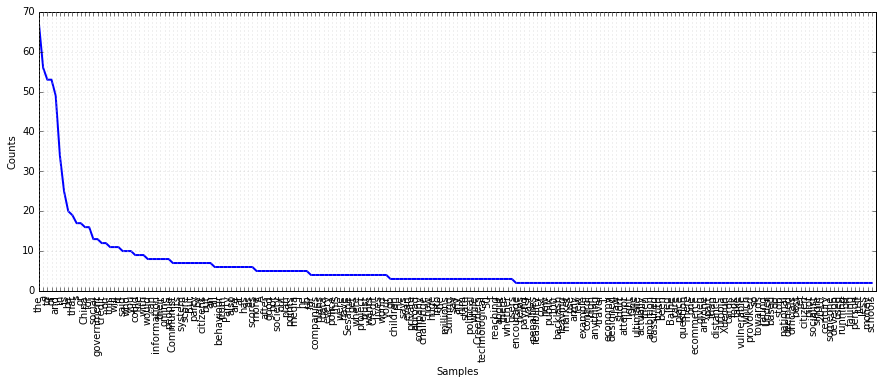

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
top200 = FreqDist(text)
plt.figure(figsize=(15,5))
top200.plot(200)

### Does the observed relative frequency of these words follow Zipf's law? Explain.

Zipf’s Law states that the frequency of a word in a corpus of text is proportional to it’s rank.

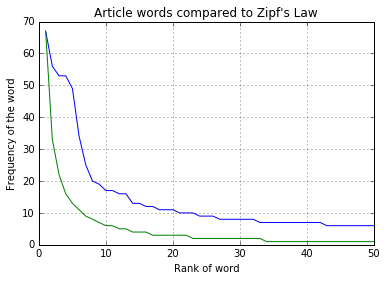

In [7]:
import matplotlib.pyplot as plt
import numpy as np
word_frequencies = frequencies

word_freq_ideal = []
d = 1
for x in word_frequencies:
    word_freq_ideal.append(word_frequencies[0] / d)
    d = d + 1

word_frequencies = np.array(word_frequencies)[:50]
word_freq_ideal = np.array(word_freq_ideal)[:50]

#blue
plt.plot([i for i in range(1, 1 + len(word_frequencies))], 
         [i for i in word_frequencies])

#green
plt.plot([i for i in range(1, 1 + len(word_frequencies))], 
         [i for i in word_freq_ideal])

plt.title("Article words compared to Zipf's Law")
plt.xlabel("Rank of word")
plt.ylabel("Frequency of the word")

plt.grid(True)

The words appear to follow the general trend but slightly higher. If "stop words" and other values are eliminated, these lines would likely become closer.

### In what ways do you think the frequency of the words in this corpus differs from "all words in all corpora"?

This is a relatively specific corpus, as most would be. To factor in the entire set of words, english or otherwise, would likely create a more uniform logarithmic scale. "All words in all corpora" also does not include all possible words written or uttered in any language.